In [1]:
import torch
import numpy as np
# Neural networks
import torch.nn as nn
# Optimization for calculating gradients and backpropagation
import torch.optim as optim
import matplotlib.pyplot as plt


# Linear regression
---

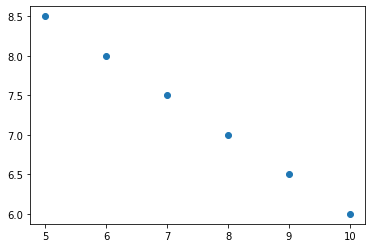

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8.0, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [3]:
# Convert python arrays to numpy arrays
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

In [4]:
# Convert numpy array to tensor
# Gradients are required for the construction of the tensor
prices = torch.from_numpy(prices_array).float().requires_grad_(True) 
# Gradients are not required because units are the target
units = torch.from_numpy(units_array).float()

#prices, prices.shape, units, units.shape

Creating model

0.015474889427423477


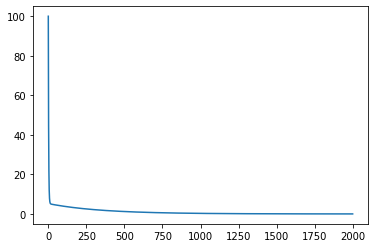

In [5]:
# Training model (input and output dimension size)
model = nn.Linear(1, 1)
# Loss function, mean square of errors
loss_function = nn.MSELoss()
# Define the optimizer, for calculate the gradient (SGD = stochastic gradient descent, lr = learing rate)
optimizer = optim.SGD(model.parameters(), lr=0.015)
losses = []
iterations = 2000
# Trainning loop
for i in range(iterations):
  # Forward pass
  # Prediction
  pred = model(prices)
  # Loss, prediction y real value
  loss = loss_function(pred, units)
  losses.append(loss.data)
  # Backware pass
  # Restart gradients
  optimizer.zero_grad()
  loss.backward()
  # Move at the minimum
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [6]:
# Prediction
x = torch.Tensor([[4.0]])
# Send prediction
p = model(x)
p

tensor([[8.7244]], grad_fn=<AddmmBackward>)

# Logistic regression
---



In [7]:
n = 100
h = n//2
dimen = 2
# Create data with random points
data = np.random.randn(n, dimen)*3

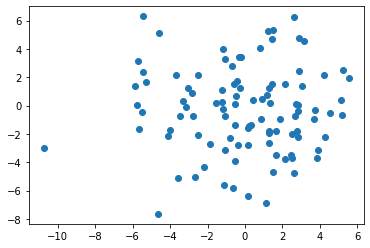

In [8]:
plt.scatter(data[:,0], data[:,1])

In [9]:
data[:h, :] = data[:h, :] - 3*np.ones((h, dimen))
data[h:, :] = data[h:, :] + 3*np.ones((h, dimen))

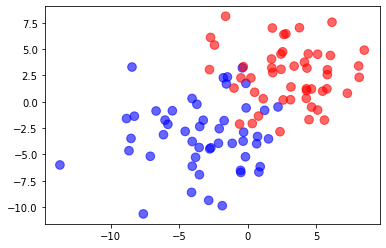

In [10]:
colors = ['blue', 'red']

color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [11]:
target = np.array([0] * h + [1] * h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1842, grad_fn=<BinaryCrossEntropyBackward>)

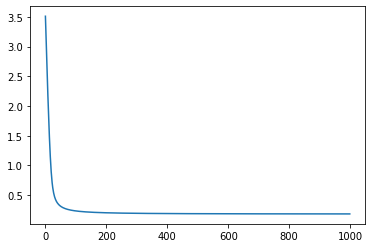

In [12]:
model = nn.Sequential( # Combine the functios of the model
                      nn.Linear(2, 1), # Linear model
                      nn.Sigmoid() # Function that oscilates between 0 and 1
        )

loss_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
losses = []
iterations = 1000

for i in range(iterations):
  # Forward
  result = model(x) #modelo
  loss = loss_function(result, y)
  losses.append(loss.data)
  # Backward
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [13]:
# Make predictions
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print('Expected: blue. Predicted:', colors[prediction])

red = torch.Tensor([[5, 6]])
prediction = model(red).data[0][0] > 0.5
print('Expected: red. Predicted:', colors[prediction])

Expected: blue. Predicted: blue
Expected: red. Predicted: red


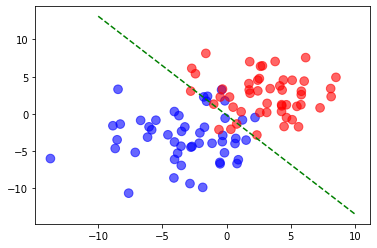

In [14]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis, 'g--')